# 1.0. IMPORTS

In [104]:
# Libraries
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import datetime
import warnings

from IPython.core.display   import display, HTML
from matplotlib import gridspec
from matplotlib import pyplot as plt
from IPython.display import Image

from tabulate import tabulate

## 1.1. Helper Functions

In [77]:
def jupyter_settings():
    warnings.filterwarnings('ignore')
    #%matplotlib inline
    #%pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    #pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

## 1.2. Loading Data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 2.0. STEP 01 - DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()

## 2.1. Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new

## 2.2. Data Dimensions

In [6]:
print('Numeber of rows {}'.format(df1.shape[0]))
print('Numeber of cols {}'.format(df1.shape[1]))

Numeber of rows 1017209
Numeber of cols 18


## 2.3. Data Types

In [7]:
# Change format date
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.4. Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [9]:
# Max value
df1['competition_distance'].max()

75860.0

In [10]:
# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 2000000.0 if math.isnan(x) else x)

# competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) 
                                                else x['competition_open_since_month'], axis=1)

# competition_open_since_year                            
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) 
                                                else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) 
                                                else x['promo2_since_week'], axis=1)
# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) 
                                                else x['promo2_since_year'], axis=1)
# promo_interval      
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec', }

# Does not return value, changes directly in column
df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 
                                                             else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [11]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [12]:
# Verify Data Types
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
# Change data types
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Descriptive Statistical

### 1.7.1. Numerical Attributes

In [14]:
# Numeric Data.
numeric_attributes = df1.select_dtypes(include=['int64', 'float64'])

# Central Tendency - Numeric Data: mean and median.
central_tendency_mean = pd.DataFrame(numeric_attributes.apply(np.mean)).T
central_tendency_median = pd.DataFrame(numeric_attributes.apply(np.median)).T

# Dispersion: std, min, max, range, skew and kurtosis.
dispersion_std = pd.DataFrame(numeric_attributes.apply(np.std)).T
dispersion_min = pd.DataFrame(numeric_attributes.apply(min)).T
dispersion_max = pd.DataFrame(numeric_attributes.apply(max)).T
dispersion_range = pd.DataFrame(numeric_attributes.apply(lambda x: x.max() - x.min())).T
dispersion_skew = pd.DataFrame(numeric_attributes.apply(lambda x: x.skew())).T
dispersion_kurtosis = pd.DataFrame(numeric_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
metrics = pd.concat([dispersion_min, dispersion_max, dispersion_range, dispersion_std,
                    central_tendency_mean, central_tendency_median, dispersion_skew, dispersion_kurtosis]).T.reset_index()

# Rename Columns
metrics.columns = ['Attributes', 'Min', 'Max', 'Range', 'Std', 'Mean', 'Median', 'Skew', 'Kurtosis']

In [15]:
metrics

,Attributes,Min,Max,Range,Std,Mean,Median,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,321.908493,558.429727,558.0,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,3.998341,4.0,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5773.818972,5744.0,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,633.145946,609.0,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,0.830107,1.0,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.381515,0.0,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.178647,0.0,1.677842,0.815154
7,competition_distance,20.0,2000000.0,1999980.0,101810.649100,10610.588099,2330.0,19.378002,375.644405
8,competition_open_since_month,1.0,12.0,11.0,3.311085,6.786849,7.0,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,5.515591,2010.324840,2012.0,-7.235657,124.071304


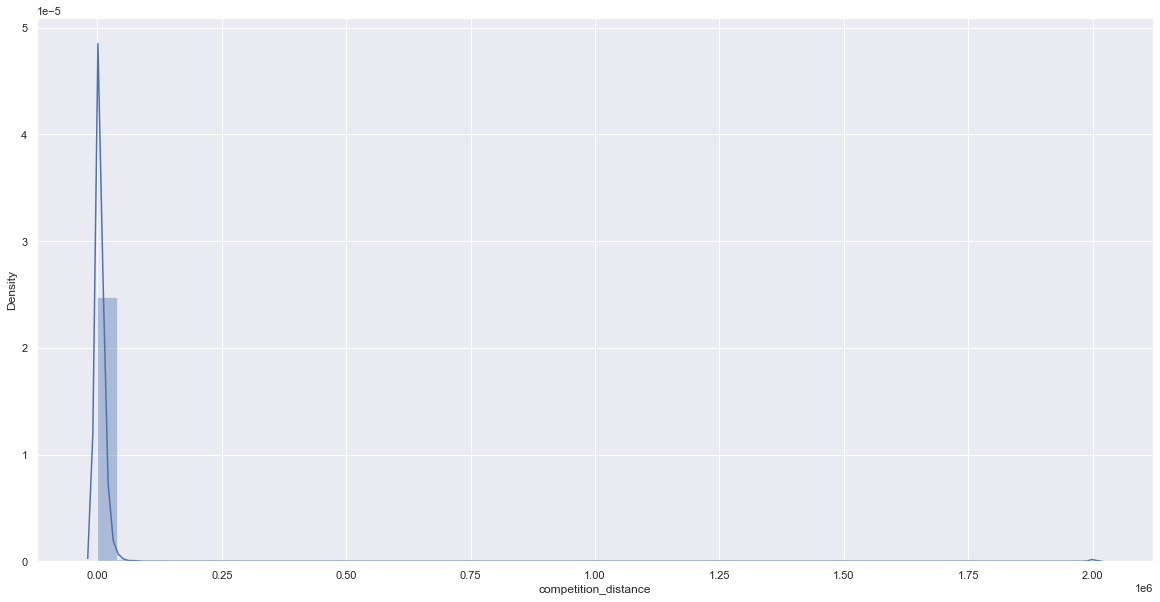

In [100]:
sns.distplot(df1['competition_distance']);

### 1.7.2. Categorical Attributes

In [17]:
# Categorical Data
categorical_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [18]:
# Check Number of Categorical Levels
categorical_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

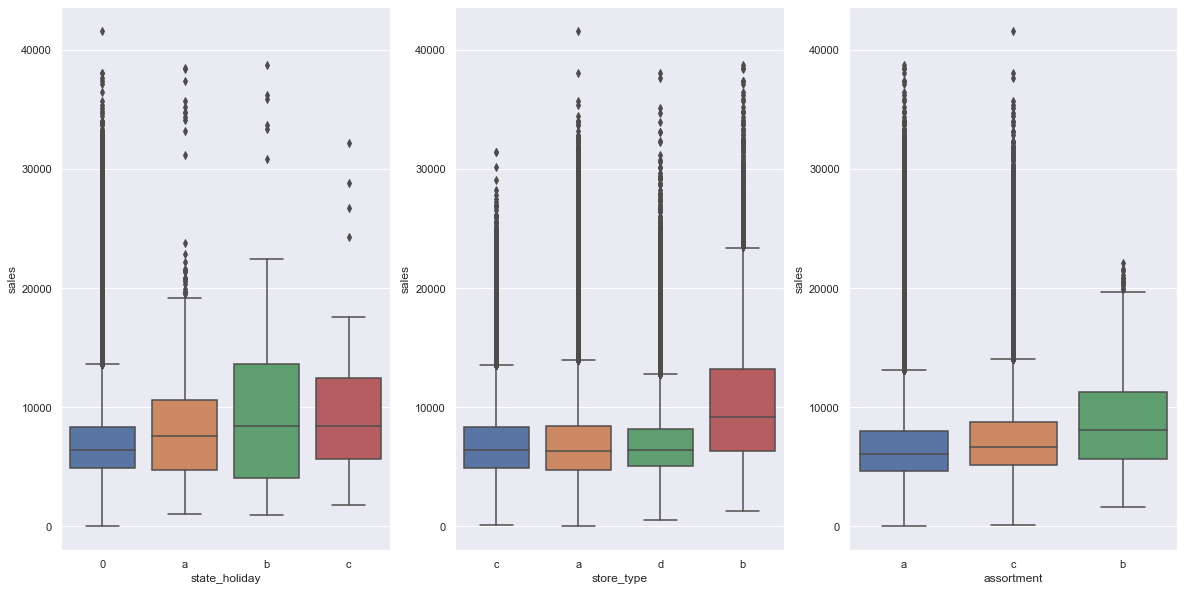

In [101]:
# Filter with effective sales.
effective_sales = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

# Graphic
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=effective_sales)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=effective_sales)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=effective_sales);

# 2.0. STEP 02 - FEATURE ENGINEERING

## 2.1. Hypothesis Mind Map

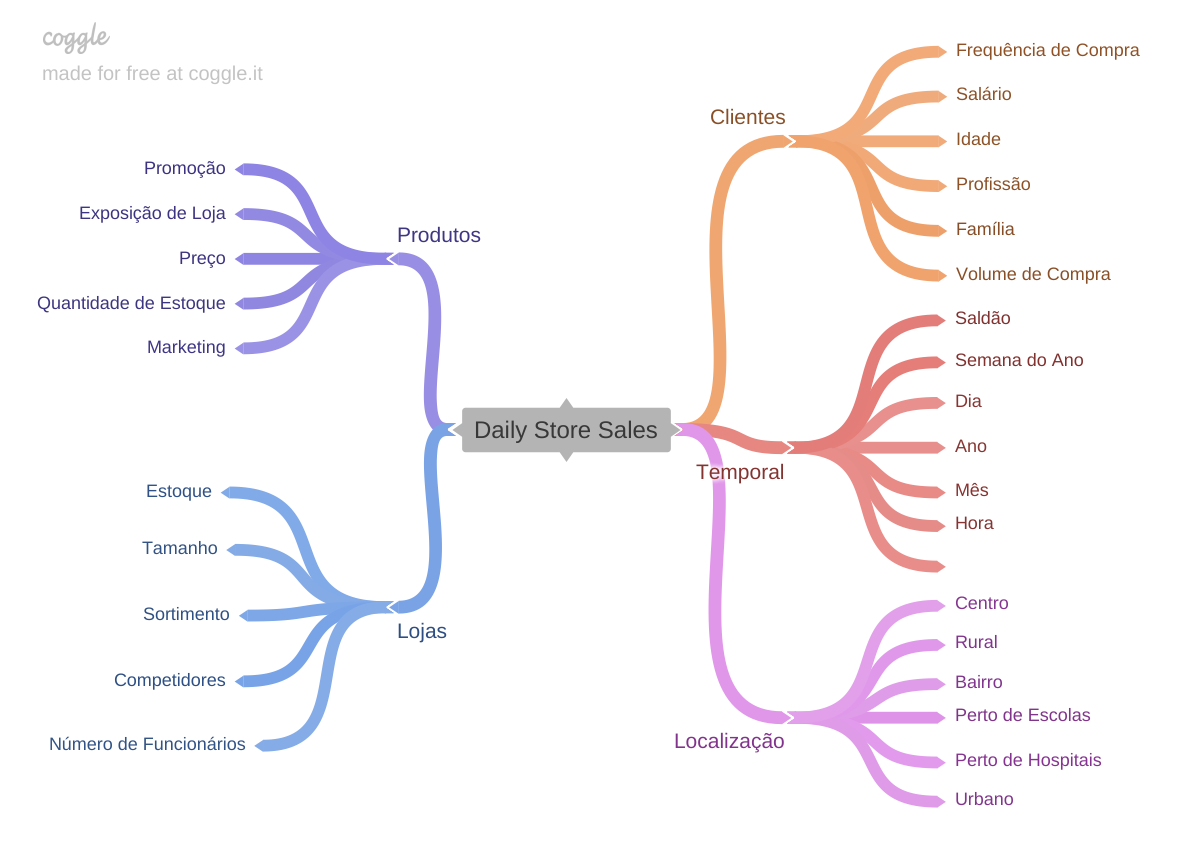

In [20]:
Image('img/mindmaphipotesis.png')

## 2.2. Hypothesis Creation

In [21]:
# Copy of Dataframe
df2 = df1.copy()

### 2.2.1. Store Hypotheses

1. Stores with more employees should sell more.
2. Stores with greater inventory capacity should sell more.
3. Larger stores should sell more.
4. Stores with larger assortments should sell more.
5. Stores with closer competitors should sell less.
6. Stores with longer competitors should sell more.

### 2.2.2. Product Hypotheses

1. Stores that invest more in Marketing should sell more.
2. Stores with more product exposure should sell more.
3. Stores with lower priced products should sell more.
5. Stores with more aggressive promotions (bigger discounts) should sell more.
6. Stores with longer running promotions should sell more.
7. Stores with more promotion days should sell more.
8. Stores with more consecutive promotions should sell more.

### 2.2.3. Time Hypotheses

1. Stores open during the Christmas holiday should sell more.
2. Stores should sell more over the years.
3. Stores should sell more in the second half of the year.
4. Stores should sell more after the 10th of each month.
5. Stores should sell less on weekends.
6. Stores should sell less during school holidays.

## 2.3. Final List of Hypotheses

1. Stores with larger assortments should sell more.
2. Stores with closer competitors should sell less.
3. Stores with longer competitors should sell more.
4. Stores with longer active promotions should sell more.
5. Stores with more promotion days should sell more.
6. Stores with more consecutive promotions should sell more.
7. Stores open during the Christmas holiday should sell more.
8. Stores should sell more over the years.
9. Stores should sell more in the second half of the year.
10. Stores should sell more after the 10th of each month.
11. Stores should sell less on weekends.
12. Stores should sell less during school holidays.

## 2.4. Feature Engineering 

In [22]:
# Derive Variables

# Year
df2['year'] = df2['date'].dt.year

# Month
df2['month'] = df2['date'].dt.month

# Week of Year
df2['week_of_year'] = df2['date'].dt.weekofyear

# Day
df2['day'] = df2['date'].dt.day

# Year Week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Competition Since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], 
                                                                 month=x['competition_open_since_month'], 
                                                                 day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# Promo Since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)    

# Assortmant
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' 
                                                  else 'christmas' if x == 'c' else 'regular_day')

In [23]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. STEP 03 - FILTERING OF VARIABLES

In [24]:
# Creating a copy of the dataframe for studies.
df3 = df2.copy()

In [25]:
# Data Visualization
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1. Line Filtering

In [26]:
# Business Restrictions
df3 = df3[(df3['open'] != 0) & (df3['sales'] >0)]

## 3.2. Selection of Columns

In [27]:
# Drop columns that will not be used
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'day', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0. STEP 04 - EXPLORATORY DATA ANALYSIS

In [28]:
# Creating a copy of the dataframe for studies.
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.1. Response Variable

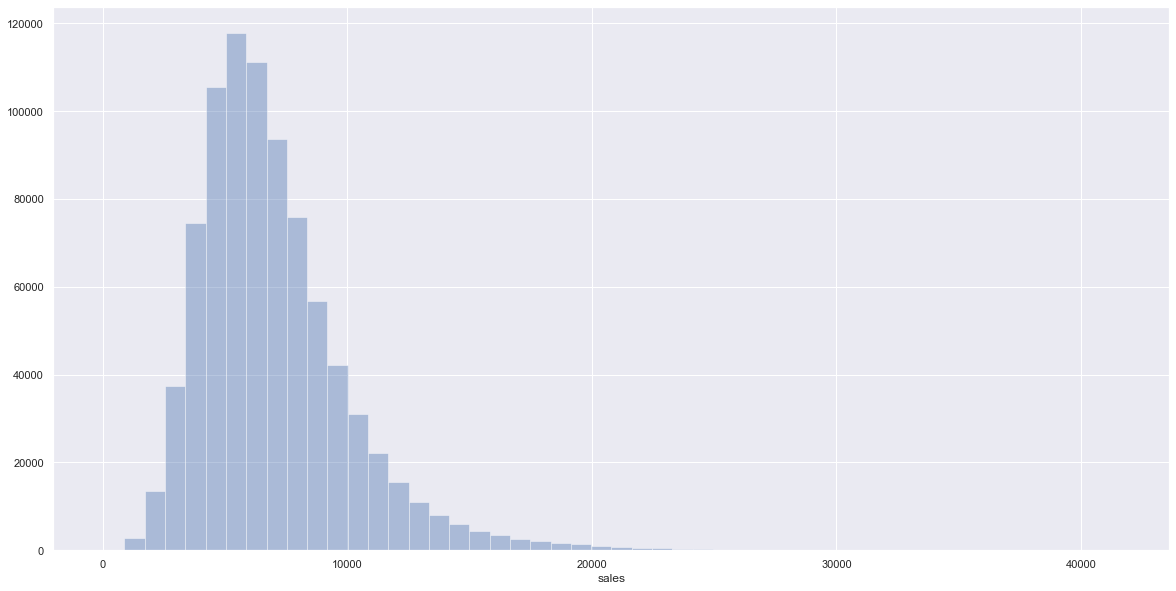

In [78]:
sns.distplot(df4['sales'], kde=False);

### 4.1.2. Numerical Variables

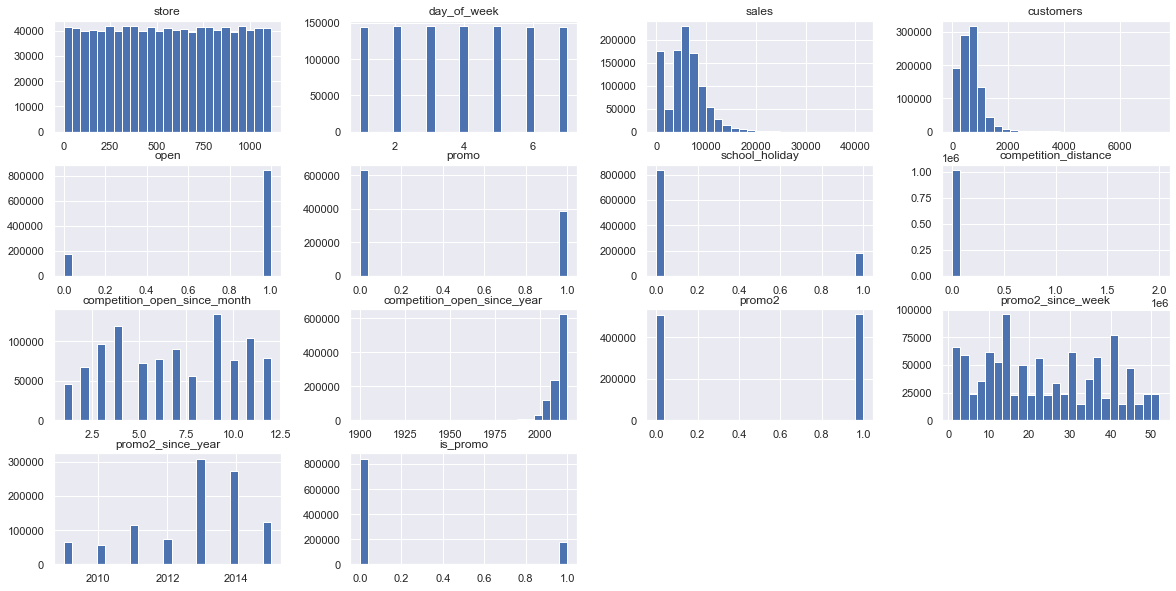

In [79]:
# Show attributes graphically
numeric_attributes.hist(bins=25);

### 4.1.3. Categorical Variables

In [31]:
# Visualization of variables
categorical_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [32]:
# Only the original categorical variable types
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

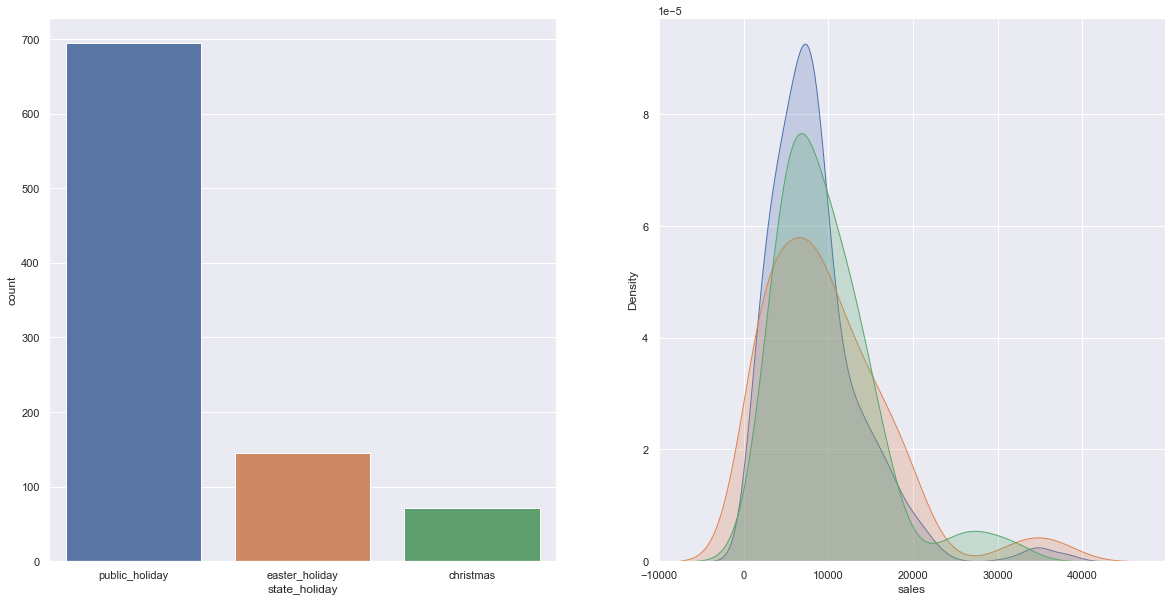

In [80]:
# State Holiday
plt.subplot(1, 2, 1)
diff = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(diff['state_holiday'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True);

In [34]:
# Only the original categorical variable types
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

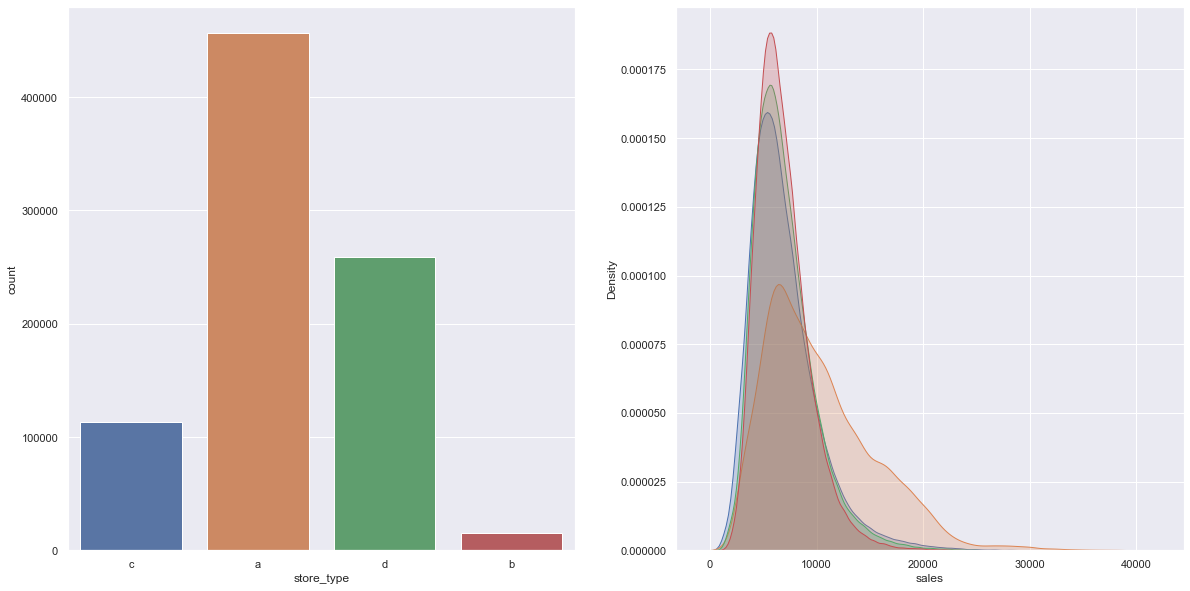

In [81]:
# Store Type
plt.subplot(1, 2, 1)
sns.countplot(df4['store_type'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True);

In [36]:
# Only the original categorical variable types
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

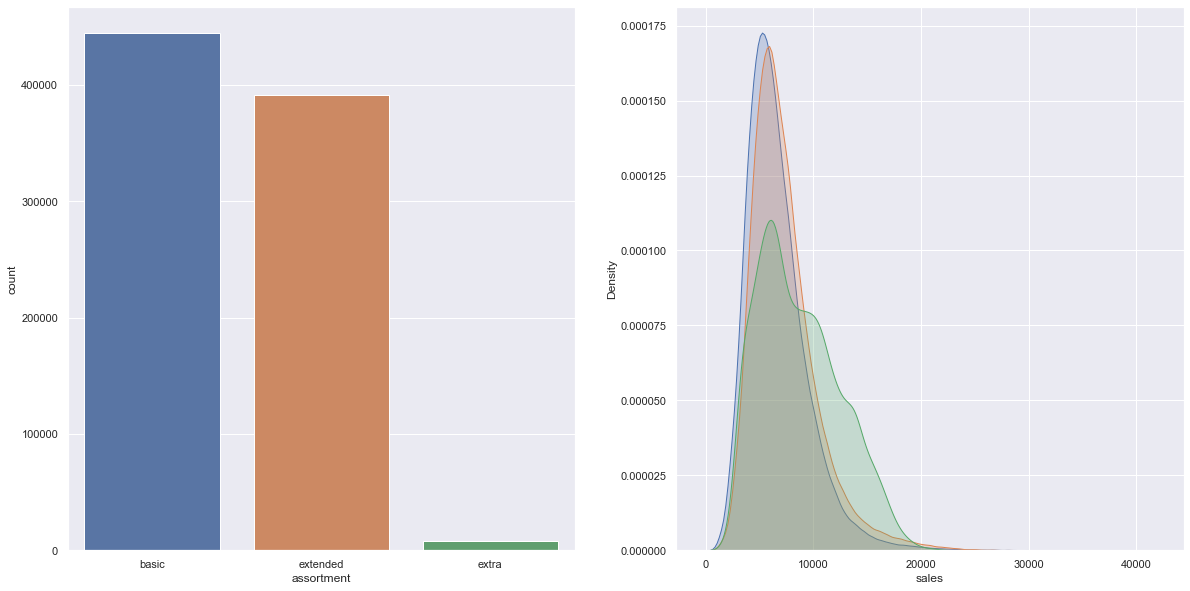

In [82]:
# Assortment
plt.subplot(1, 2, 1)
sns.countplot(df4['assortment'])

plt.subplot(1, 2, 2)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True);

## 4.2. Bivariate Analysis

### **Hypothesis 1** Stores with larger assortments should sell more.
**FALSE** - Larger assortment stores sell less.

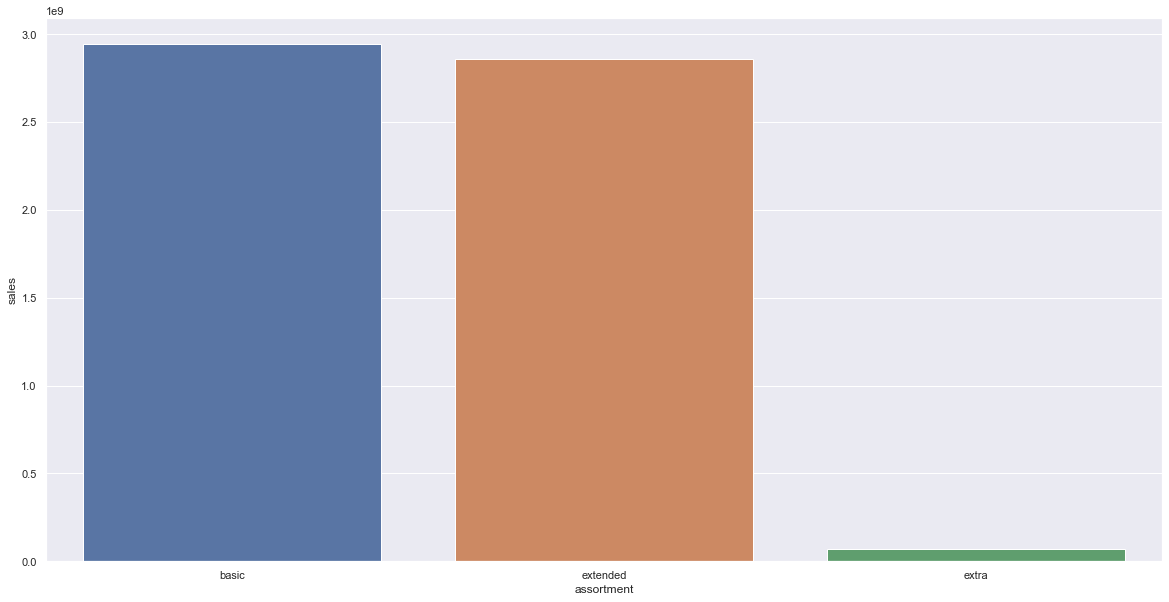

In [83]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1);

In [39]:
aux1.head()

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


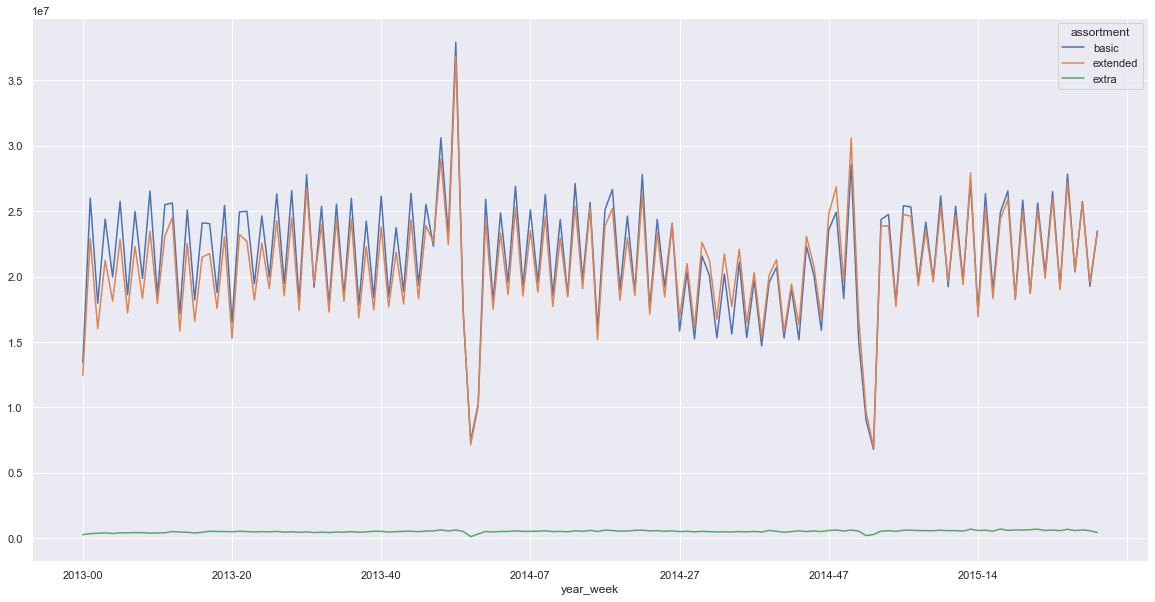

In [84]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot();

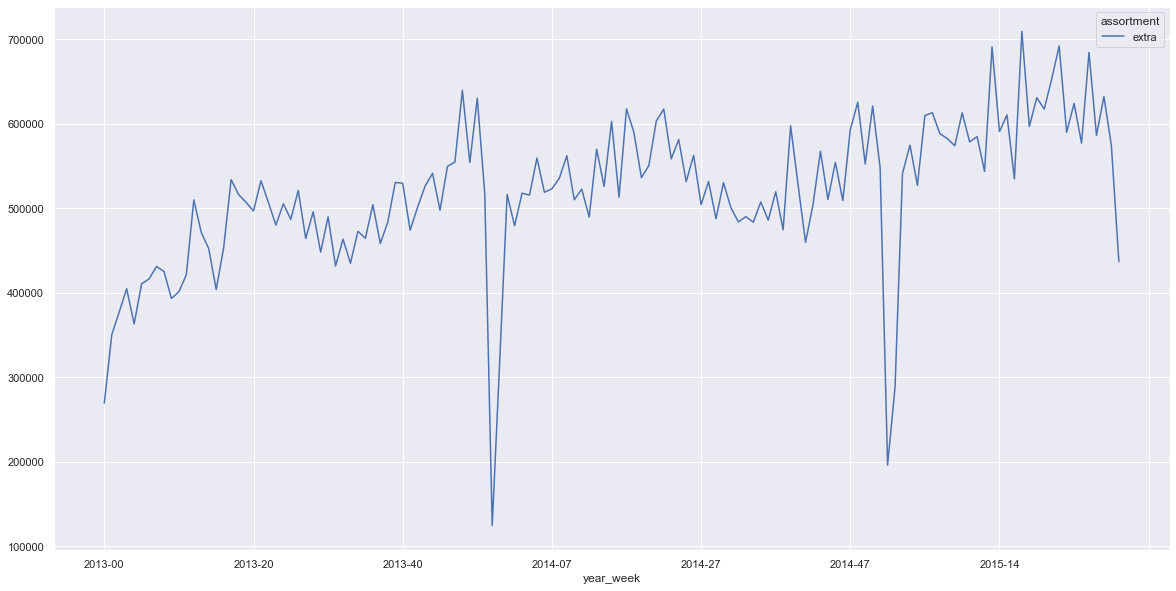

In [85]:
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot();

### **Hypothesis 2** Stores with closer competitors should sell less.
**FALSE** - Stores with closer competitors sell more.

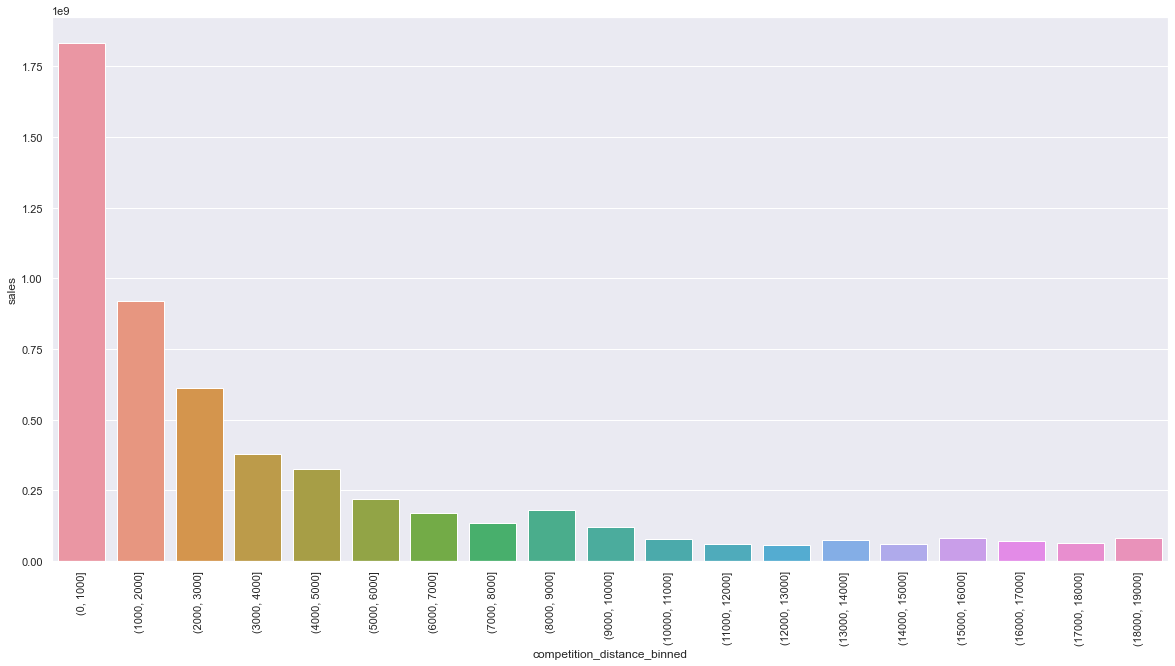

In [86]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)

aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation=90);

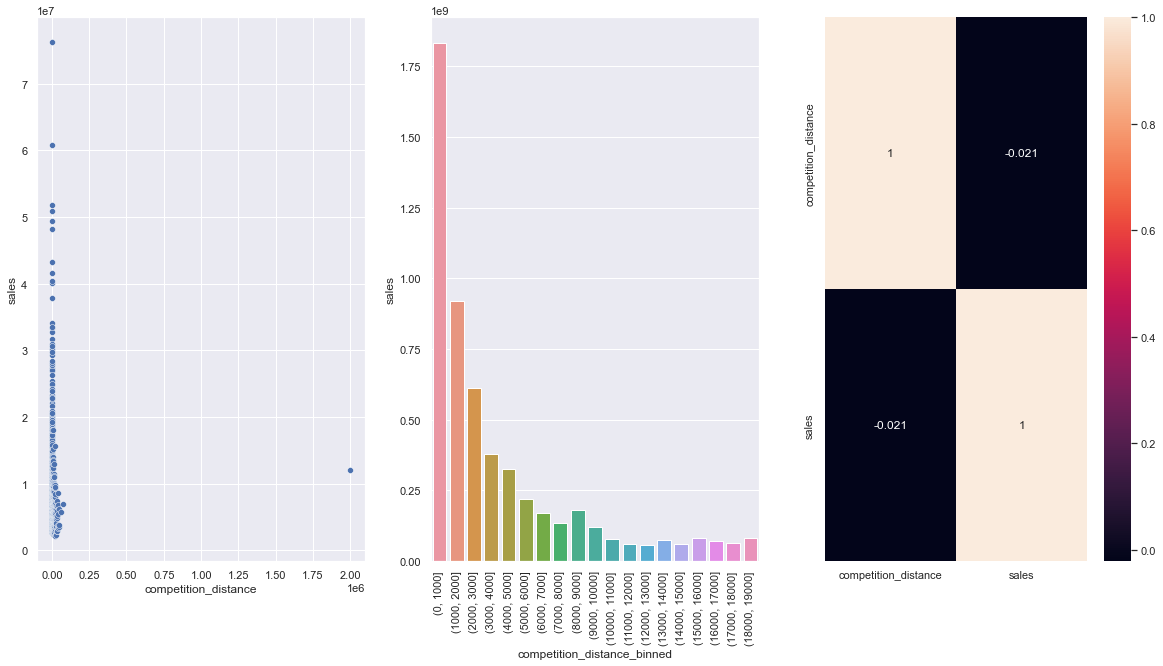

In [87]:
# Other way - when the data is too grainy
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **Hypothesis 3** Stores with longer competitors should sell more.
**FALSE** - Stores with longer competitors sell less.

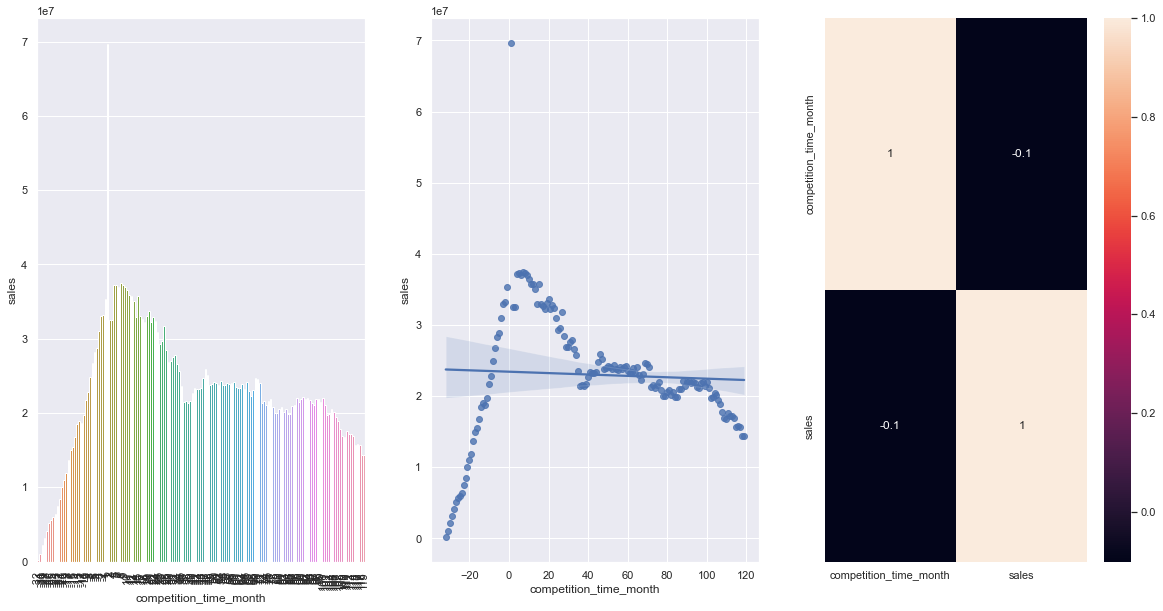

In [88]:
plt.subplot(1, 3, 1)
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **Hypothesis 4** Stores with longer active promotions should sell more.
**FALSE** - Stores with active promotions for longer sell less, after a certain period of promotion.

In [45]:
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

In [46]:
grid = gridspec.GridSpec(2,3)

KeyError: 'promo_time_week'

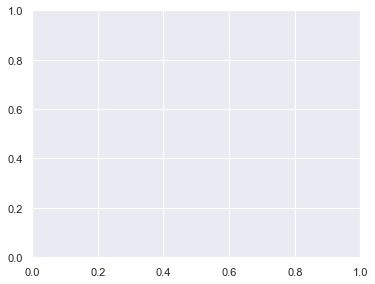

In [89]:
plt.subplot(grid[0, 0])
aux2 = aux1[aux1['promo_time_week'] > 0] # Extended promotion.
sns.barplot(x='promo_time_week', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(grid[0, 1])
sns.regplot(x='promo_time_week', y='sales', data=aux2)

plt.subplot(grid[1, 0])
aux3 = aux1[aux1['promo_time_week'] < 0] # Regular promotion.
sns.barplot(x='promo_time_week', y='sales', data=aux3)
plt.xticks(rotation=90)

plt.subplot(grid[1,1])
sns.regplot(x='promo_time_week', y='sales', data=aux3)

plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### <s>**Hypothesis 5.** Stores with more promotion days should sell more.</s>

### **Hypothesis 6.** Stores with more consecutive promotions should sell more.
**FALSE** - Stores with more consecutive promotions sell less

In [48]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


In [ ]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax) # Plot aux1 and aux2 within the same grid.

ax.legend(labels=['Traditional & Extended', 'Extended']);

### **Hypothesis 7.** - Stores open during the Christmas holiday should sell more.
**FALSE** - Stores open during the Christmas holiday sell less.


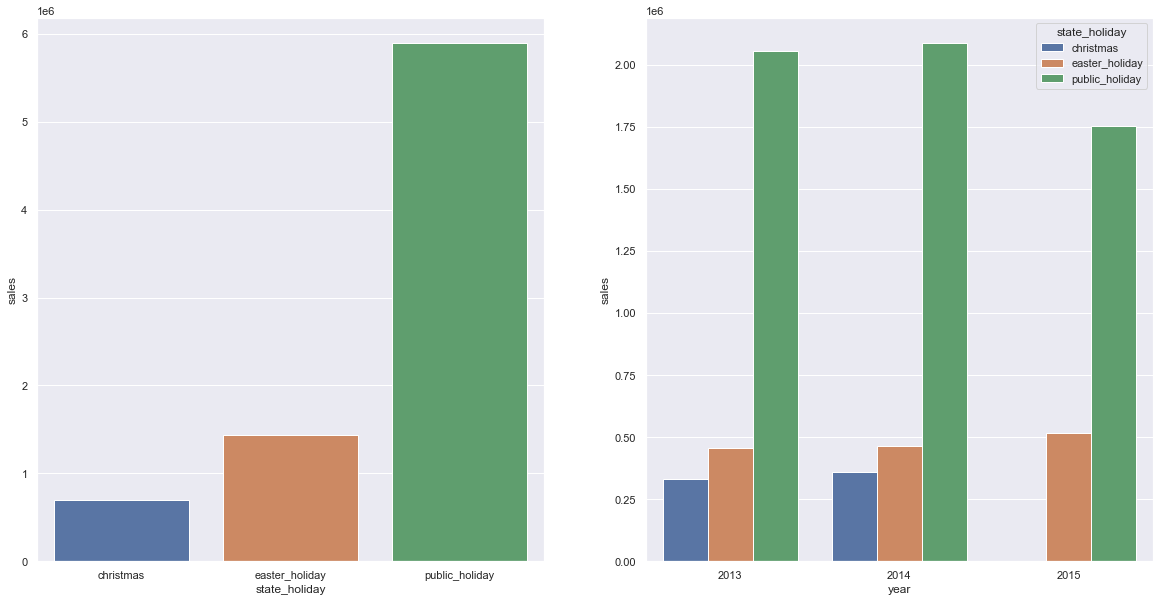

In [90]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(1, 2, 1)

aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux1)

plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

### **Hypothesis 8.** - Stores should sell more over the years.
**FALSE** - Stores sell less over the years.

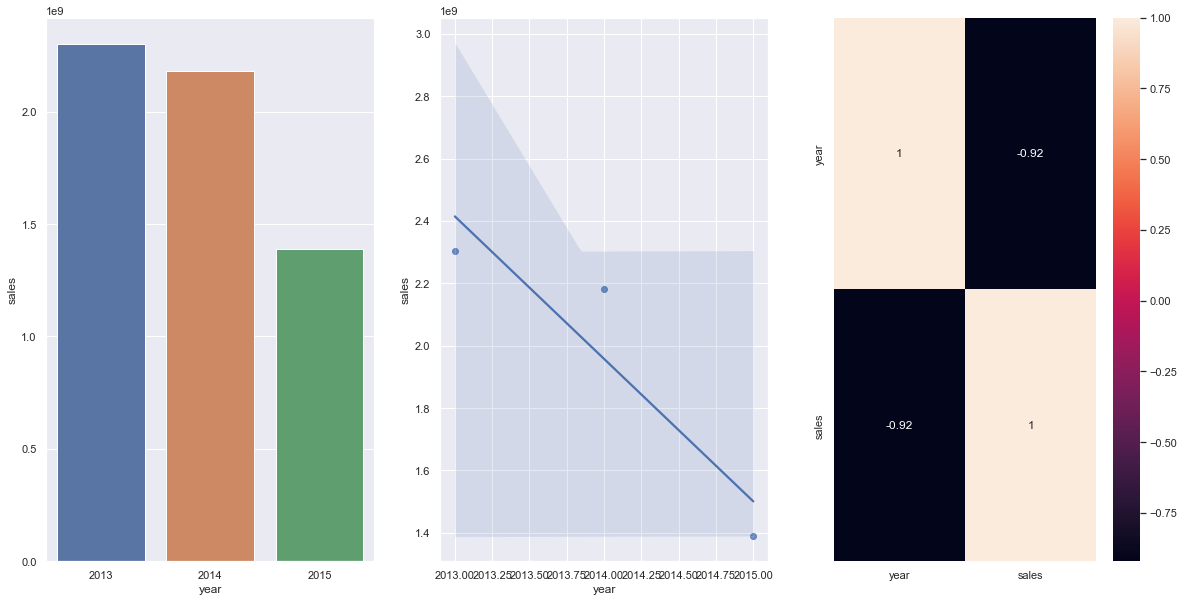

In [93]:
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **Hypothesis 9.** - Stores should sell more in the second half of the year.
**FALSE** - Stores sell less in the second half of the year.

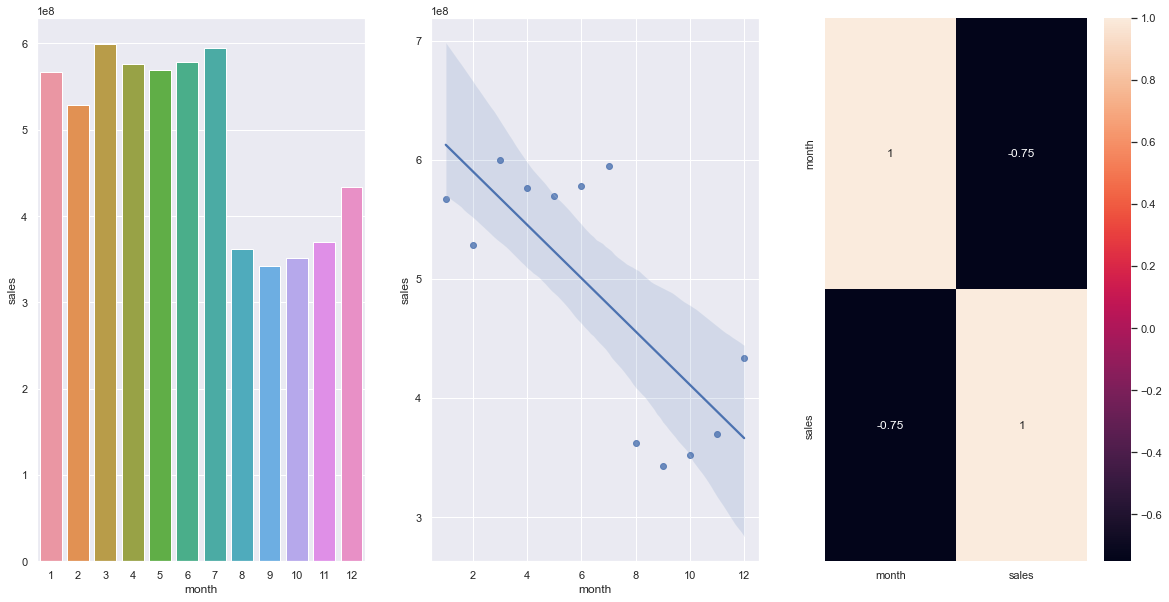

In [94]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='month', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **Hypothesis 10.** - Stores should sell more after the 10th of each month.
**TRUE** - Stores sell more after the 10th of each month.

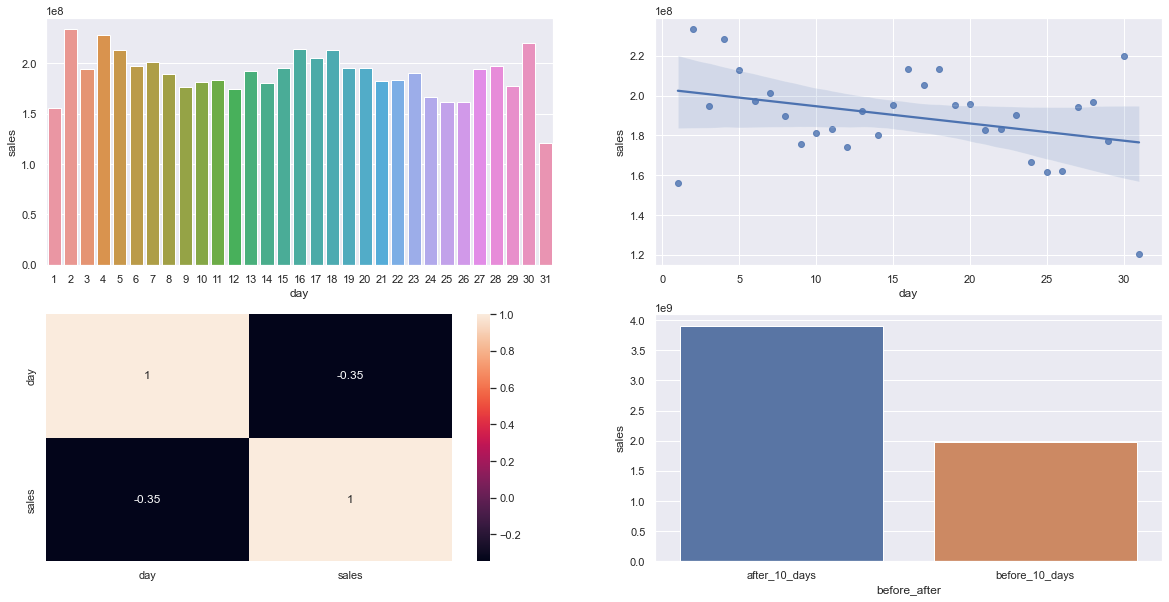

In [96]:
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot(2, 2, 1)
sns.barplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 2)
sns.regplot(x='day', y='sales', data=aux1)

plt.subplot(2, 2, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

# Check before and after the 10th of each month.
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

plt.subplot(2, 2, 4)
sns.barplot(x='before_after', y='sales', data=aux2);

### **Hypothesis 11.** - Stores should sell less on weekends.
**TRUE** - Stores sell less on weekends.

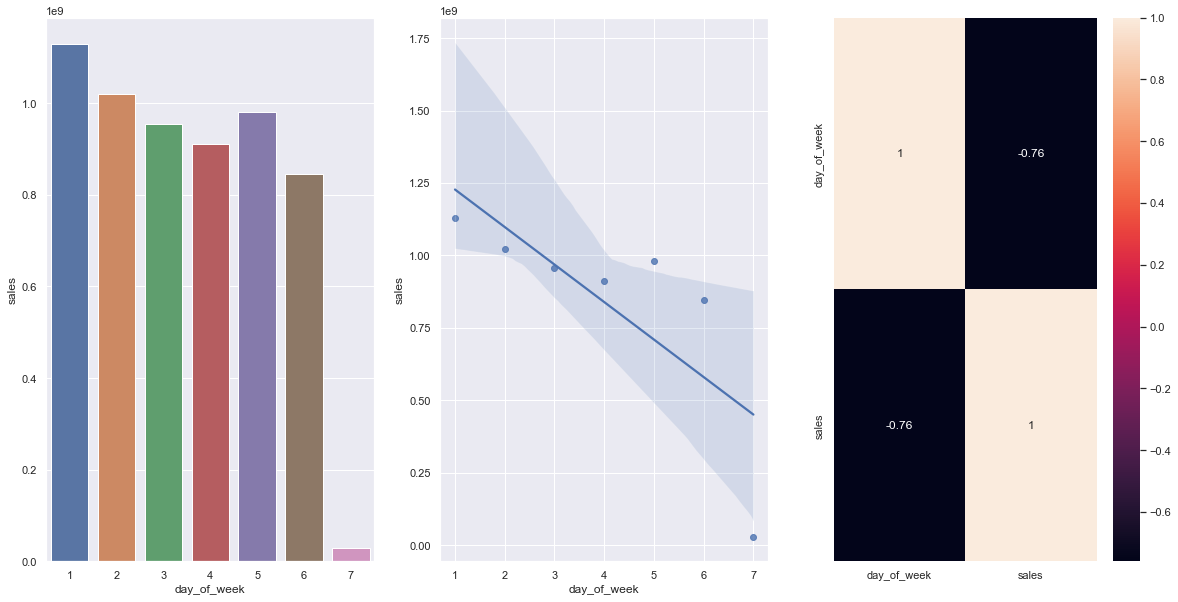

In [97]:
aux1 = df4[['day_of_week', 'sales',]].groupby('day_of_week').sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.regplot(x='day_of_week', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### **Hypothesis 12.** - Stores should sell less during school holidays.
**TRUE** - Stores sell less during school holidays, except July and August.

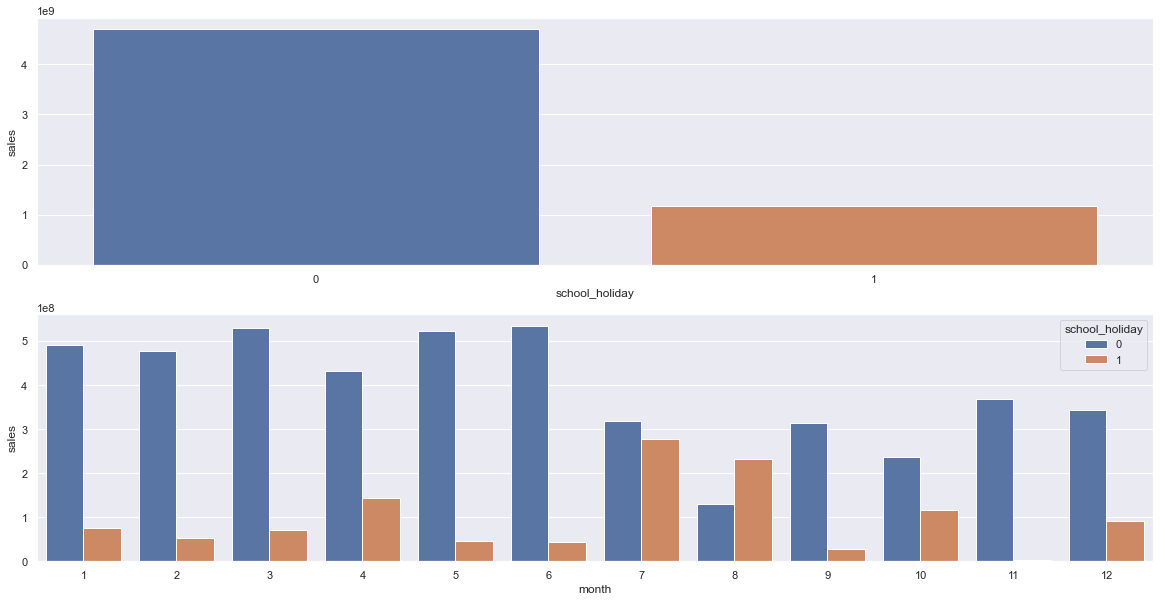

In [98]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2, 1, 1)
sns.barplot(x='school_holiday', y='sales', data=aux1)

aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()

plt.subplot(2, 1, 2)
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux2);

### 4.2.1. Summary of Hypotheses

In [105]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H1', 'Falsa', 'Baixa'],  
      ['H2', 'Falsa', 'Media'],  
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', '-', '-'],
      ['H7', 'Falsa', 'Baixa'],
      ['H8', 'Falsa', 'Media'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Falsa', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Alta'],
      ['H13', 'Verdadeira', 'Baixa'],]  

print(tabulate( tab, headers='firstrow'))

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa
